# Measuring Expectation Values

One of the most important tasks on in quantum mechanics is measuring an expectation value. Quantum mechanics is not determistic, it only tells us the **probabilities** of having different outcomes. Each different run of a experiment may give a different result.

If we, for example, were in the state:
$$ |\phi \rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} $$
then the probability of measuring "0" would be
$$ P_0 = |a_0|^2 = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} $$
and the probability of measuring the state "1" would be
$$ P_1 = |a_1|^2 = \left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2} $$

## Observables

In quantum mechanics, we often assocatate states with different values. For example, a particular state might have an energy, or a postion or a particular momentum. These values, which we call "observables" correspond to the **eigenvalues** of a matrix.

For example, consider the matrix "Z":

$$ Z = \left[ \begin{matrix} 1 & 0 \\ 0 & -1 \end{matrix} \right]$$

It has two eigenvalues, 

  - $+1$ which is associated with the $|0\rangle$ eigenstate.

  - $-1$ which is associated with the $|1\rangle$ eigenstate.

So if we are measuring "Z" then we associate measuring $|0\rangle$ with a value of $+1$, and measuring $|1\rangle$ with a value of $-1$.

# Expectation Values

Often we want to know about the mean value, or expecation value of an observable. For example, we may wish to know the expectation value of $Z$. We write this as $ \langle Z \rangle $.

In the case above, the expectation value is:

$$ \langle Z \rangle = P_0 \times (+1) + P_1 \times (-1) \\
= \frac{1}{2} - \frac{1}{2} \\
= 0 $$

For a general state $|\psi\rangle$ the expectation of an operator, $A$ is given by
$$ \langle A \rangle = \langle \psi | A | \psi \rangle $$

## Measuring on a quantum computer

Let us now determine an expectation value of $\langle Z \rangle$ on a quantum computer. We will do this by deterimining the probabilities, $P_0$ and $P_1$ using a quantum computer and the calculate the expectation value as above.

To create an equal superposition we will use a single Hadamard gate.

As before, set up a real device as a backend.

In [38]:
import numpy as np
from qiskit import *

In [39]:
# Load your IBM Quantum account
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-melbourne', group='teaching', project='default')

# Select all operational devices with more than 2 qubits
backends_sel = provider.backends(filters=lambda x:not x.configuration().simulator and 
                                x.configuration().n_qubits >=2 and x.status().operational==True)
backends_sel

ibmqfactory.load_account:WARNING:2021-12-05 23:54:18,418: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q-melbourne', group='teaching', project='default')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-melbourne', group='teaching', project='default')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-melbourne', group='teaching', project='default')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-melbourne', group='teaching', project='default')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-melbourne', group='teaching', project='default')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q-melbourne', group='teaching', project='default')>]

In [40]:
# Select the device with the shortest queue
from qiskit.providers.ibmq import least_busy

backend = least_busy(backends_sel)
backend

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-melbourne', group='teaching', project='default')>

In [41]:
# Create a Quantum Circuit acting on a quantum register of one qubit
circ = QuantumCircuit(1,1)

In [42]:
circ.h(0)

circ.measure(range(1), range(1))

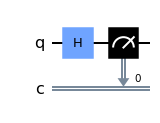

In [43]:
circ.draw('mpl')

Now we will run the job on a the device

In [44]:
from qiskit.tools.monitor import job_monitor

job = execute(circ, backend)
job_monitor(job)

Job Status: job has successfully run


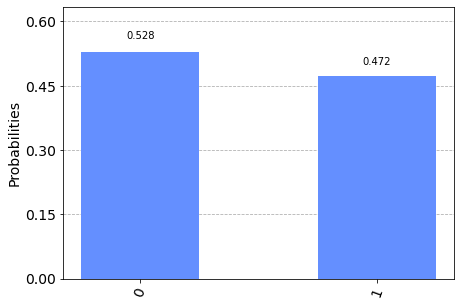

In [45]:
from qiskit.visualization import plot_histogram

counts = job.result().get_counts()
plot_histogram(counts)

In [46]:
counts

{'0': 541, '1': 483}

In [47]:
P0 = counts['0']/sum(counts.values())
P1 = counts['1']/sum(counts.values())

P0, P1

(0.5283203125, 0.4716796875)

In [48]:
expectation_Z = P0 * 1 + P1*(-1)

In [49]:
expectation_Z

0.056640625

Notice that this isn't exactly 0, as it would be in theory. This is because of a finite number of runs/shots, and also because of errors present in the machine.

## Measuring in other bases

It is also possible to determine the expectation values of other observables. For example

$$ X = \left[ \begin{array}{cc} 0 & 1 \\ 1 & 0 \end{array}  \right] $$

or 

$$ Y = \left[ \begin{array}{cc} 0 & -i \\ i & 0 \end{array}  \right] $$

These matrices have eigenvalues of $\pm 1$, just like $Z$, however they have different basis of eigenstates.

Because measurement is naturally made in the computational/z-basis, a rotation is applied first to rotate into this basis. To measure $\langle X \rangle$, we first apply a hadamard gate, directly before measurement:

In [50]:
qc = QuantumCircuit(1, 1)

# .... set up the state you want to measure here...

qc.barrier()

qc.h(0) # This hadamard gate changes the basis of the measurement
qc.measure(range(1), range(1))

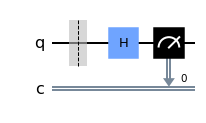

In [51]:
qc.draw('mpl')

Let's find $\langle X \rangle$ for the equal superposition state, which we created above.

In [66]:
qc = QuantumCircuit(1, 1)

# .... set up the state you want to measure here...
qc.h(0)


qc.barrier()

qc.h(0) # This hadamard gate changes the basis of the measurement for an X-measurement
qc.measure(range(1), range(1))

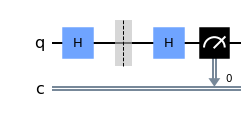

In [58]:
qc.draw('mpl')

Here the first Hadamard gate initialises the state. The second changes basis, so that we measure $\langle X \rangle$ rather than $\langle Z \rangle$.

In [59]:
job = execute(qc, backend)
job_monitor(job)

Job Status: job has successfully run


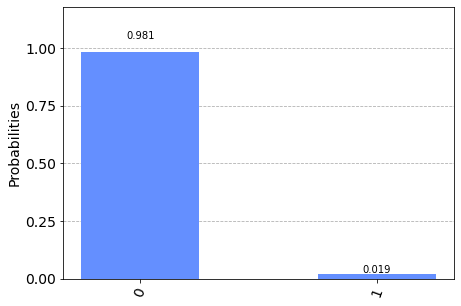

In [60]:
counts = job.result().get_counts()
plot_histogram(counts)

In [61]:
P0 = counts['0']/sum(counts.values())
P1 = counts['1']/sum(counts.values())

P0, P1

(0.9814453125, 0.0185546875)

As before we have,

In [62]:
expectation_X = P0 * 1 + P1*(-1)
expectation_X

0.962890625

Similarly, we can find $\langle Y \rangle$ by rotating basis with $H S^\dagger$:

In [65]:
qc = QuantumCircuit(1, 1)

# .... set up the state you want to measure here...

qc.barrier()

qc.sdg(0) # The following two gates change the basis to give a Y-measurement 
qc.h(0)
qc.measure(range(1), range(1))

<div class="alert alert-block alert-success">

**Exercise**

Using the circuit above, determine $\langle Y \rangle$ for the equal superposition state using a quantum computer.
    
</div>

<div class="alert alert-block alert-info">
<b>Aside:</b> If you plot a point with co-ordinates ($\langle X \rangle$, $\langle Y \rangle$, $\langle Z \rangle$) without noise these lie on a sphere, the "Bloch Sphere" - as we saw yesterday. With noise, these points can often lie inside the sphere - the more noisy the quantum computer, the closer to the origin they lie.
</div>

<div class="alert alert-block alert-success">

**Exercise**

Using a quantum computer, determine $\langle X \rangle$, $\langle Y \rangle$, and $\langle Z \rangle$ for the state you obtain by a rotation $R_y(\pi/4)$ applied to the $|0\rangle$ state.

</div>

## Expecation values with more than one qubit

If you have more than one qubit, you can have observable which are products. For example, the observable $Z_1 Z_2$, for the state $|ket{01}\rangle has the value,

$$+1 \times -1 = -1$$

In this case you would measure *both* qubits 1 and 2, and multiply the values you obtained from each individual qubit.

<div class="alert alert-block alert-success">

**Exercise**

Using a quantum computer, determine $\langle ZZ \rangle$ for the state $\frac{|00 \rangle + |11 \rangle}{\sqrt{2}}$.

</div>

To measure in a different basis (for example, x-basis or y-basis), apply the same rotations as in the single qubit case before measuring. 

<div class="alert alert-block alert-success">

**Exercise**

Using a quantum computer, determine $\langle XX \rangle$ for the state $\frac{|00 \rangle + |11 \rangle}{\sqrt{2}}$.

</div>